In [1]:
import pandas as pd
import numpy as np
import darts

In [2]:
# Load from file
mega_df = pd.read_csv("final_raw_data_all_featues.csv")

# Change timestamp to column and set as index (needed for darts)
mega_df['timestamp'] = pd.to_datetime(mega_df['timestamp'])
# mega_df.set_index('timestamp', inplace=True)

# # Check
# mega_df.index.inferred_type == "datetime64"

mega_df = mega_df.dropna().drop_duplicates(subset='timestamp').reset_index()
mega_df.head()

,index,timestamp,open,high,low,close,volume,CMF,FII,MFI,...,wma_100,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
0,199,2019-09-17 03:00:00,10257.30,10261.36,10175.20,10216.78,940.523,-0.143765,0.748869,28.755168,...,10277.461349,3005.7,2.25,1.7,1,0.46011,0.28313,-1,47.820236,-1
1,200,2019-09-17 04:00:00,10216.35,10238.95,10194.39,10209.45,872.764,-0.120924,-913.266701,28.652105,...,10275.790895,3005.7,2.25,1.7,1,0.45992,0.46011,-1,48.386232,-1
2,201,2019-09-17 05:00:00,10208.81,10232.07,10204.53,10223.97,819.923,-0.114688,917.954536,36.501645,...,10274.443495,3005.7,2.25,1.7,-1,0.40934,0.45992,-1,42.873022,-1
3,202,2019-09-17 06:00:00,10224.11,10230.44,10187.88,10224.09,922.804,-0.112046,802.637671,36.306243,...,10273.130448,3005.7,2.25,1.7,-1,0.31251,0.40934,-1,42.291553,-1
4,203,2019-09-17 07:00:00,10225.02,10230.79,10192.69,10193.85,905.598,-0.124361,-3224.208213,35.631136,...,10271.256418,3005.7,2.25,1.7,-1,0.14629,0.31251,-1,41.595938,-1


In [3]:
mega_df['timestamp']

0       2019-09-17 03:00:00
1       2019-09-17 04:00:00
2       2019-09-17 05:00:00
3       2019-09-17 06:00:00
4       2019-09-17 07:00:00
                ...        
32537   2023-06-03 20:00:00
32538   2023-06-03 21:00:00
32539   2023-06-03 22:00:00
32540   2023-06-03 23:00:00
32541   2023-06-04 00:00:00
Name: timestamp, Length: 32542, dtype: datetime64[ns]

In [4]:
max_nulls = 0

for column in mega_df.columns:
    null_vals = mega_df[column].isna().sum()
    print(f"{column} has {null_vals} values")
    if null_vals > max_nulls:
        max_nulls = null_vals
print(max_nulls)

index has 0 values
timestamp has 0 values
open has 0 values
high has 0 values
low has 0 values
close has 0 values
volume has 0 values
CMF has 0 values
FII has 0 values
MFI has 0 values
VWA has 0 values
AOI has 0 values
KAMA has 0 values
PPO has 0 values
PPO_signal has 0 values
PVO has 0 values
PVO_signal has 0 values
ROC has 0 values
rsi has 0 values
stoch_RSI has 0 values
StochOscillator has 0 values
StochOscillator_signal has 0 values
TSI has 0 values
UltimateOscillator has 0 values
WilliamsRIndicator has 0 values
ATR has 0 values
BOL_lband has 0 values
BOL_hband has 0 values
BOL_avg has 0 values
KCW has 0 values
KCP has 0 values
KCM has 0 values
DCL has 0 values
DCH has 0 values
DCM has 0 values
ULI has 0 values
ADX has 0 values
ADX_neg has 0 values
ADX_pos has 0 values
ARI_down has 0 values
ARI has 0 values
ARI_up has 0 values
CCI has 0 values
DPO has 0 values
EMA_14 has 0 values
EMA_20 has 0 values
EMA_50 has 0 values
EMA_100 has 0 values
EMA_200 has 0 values
KST has 0 values
KST_

In [5]:
from darts import TimeSeries
from darts.models import AutoARIMA

In [6]:
problem_rows = []
expected_delta = pd.Timedelta(1, 'h')

for i, row in mega_df.iterrows():
    if i != 0:
        if row["timestamp"] - mega_df["timestamp"].iloc[i-1] != expected_delta:
            problem_rows.append(i)
            
problem_rows

[]

In [7]:
series = TimeSeries.from_dataframe(mega_df, 'timestamp', 'close', freq='1h')

train, val = series.split_before(pd.Timestamp('2023-01-01 00:00:00'))

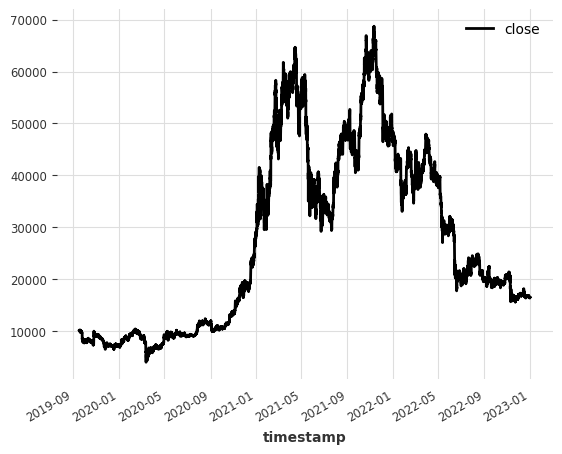

In [8]:
train.plot()

In [9]:
aarima_model = AutoARIMA(
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    m=1,
    d=1,
    seasonal=False,
    start_P=0,
    D=None,
    trace=True,
    error_action='ignore',
    suppress_warnings=True, stepwise=True
)

aarima_model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=401625.521, Time=4.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=401631.838, Time=0.43 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=401633.484, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=401633.471, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=401629.860, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=401619.778, Time=5.91 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=401626.472, Time=1.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=401620.917, Time=8.27 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=401621.812, Time=6.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=401619.913, Time=7.01 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=401627.185, Time=1.91 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=401623.753, Time=8.78 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=401617.797, Time=1.46 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=401623.539, Time=1.01 sec
 ARIM

AutoARIMA(add_encoders=None, start_p=1, start_q=1, max_p=5, max_q=5, m=1, d=1, seasonal=False, start_P=0, D=None, trace=True, error_action=ignore, suppress_warnings=True, stepwise=True)

In [10]:
aarima_model.model_params

OrderedDict([('add_encoders', None),
             ('start_p', 1),
             ('start_q', 1),
             ('max_p', 5),
             ('max_q', 5),
             ('m', 1),
             ('d', 1),
             ('seasonal', False),
             ('start_P', 0),
             ('D', None),
             ('trace', True),
             ('error_action', 'ignore'),
             ('suppress_warnings', True),
             ('stepwise', True)])

In [11]:
prediction = aarima_model.predict(len(val))

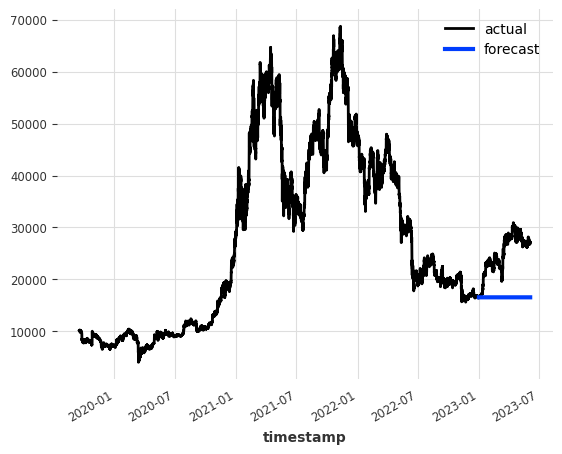

In [12]:
import matplotlib.pyplot as plt

series.plot(label='actual')
prediction.plot(label='forecast', lw=3)
plt.legend()

In [13]:
# This takes forever to run (hours and hours)

# model = AutoARIMA()

# backtest = model.historical_forecasts(
#     series, 
#     start=0.95, 
#     forecast_horizon=1
# )

KeyboardInterrupt: 